# 1) GENERAZIONE E TRAINING RETE GROUND TRUTH CON SIGMOIDE

Genero un dataset semplice ed una rete che utilizza una sigmoide eseguo il training per avere una MLP che con una sigmoide esegue l'ottimizzazione dei parametri

In [24]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt

X=np.linspace(-2,2,1000).reshape(-1,1)
Y=np.sin(X)


In [25]:
class MLP(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.activation = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size,output_size)
    
    def forward(self,x):
        x=self.activation(self.fc1(x))
        x=self.fc2(x)
        return x

model=MLP(1,8,1)


In [26]:
mse_loss=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.01)

In [27]:
X_tensor = torch.tensor(X,dtype=torch.float32)
Y_tensor = torch.tensor(Y,dtype=torch.float32)

In [28]:
loss_values=[]
for epoch in range(500):
    model.train()
    optimizer.zero_grad()
    output=model(X_tensor)
    loss=mse_loss(output,Y_tensor)
    loss_values.append(loss.item())
    print(loss.item())
    loss.backward()
    optimizer.step()
    

0.6381873488426208
0.6094754934310913
0.5822657346725464
0.5565038919448853
0.5320664644241333
0.5087488889694214
0.486307829618454
0.4645475447177887
0.44336196780204773
0.4227166175842285
0.40261590480804443
0.38308045268058777
0.3641340434551239
0.34579765796661377
0.3280852735042572
0.31100085377693176
0.2945372760295868
0.2786758542060852
0.2633899450302124
0.24865001440048218
0.23442839086055756
0.22070340812206268
0.20746128261089325
0.19469648599624634
0.18240998685359955
0.17060622572898865
0.1592899113893509
0.14846308529376984
0.13812336325645447
0.12826356291770935
0.11887264996767044
0.1099376529455185
0.10144590586423874
0.09338704496622086
0.08575399965047836
0.07854249328374863
0.07175004482269287
0.06537400931119919
0.05940989404916763
0.053850360214710236
0.04868501424789429
0.043901100754737854
0.0394846573472023
0.03542180731892586
0.031699519604444504
0.02830570936203003
0.0252287145704031
0.02245638333261013
0.019975248724222183
0.017770063132047653
0.015823874622

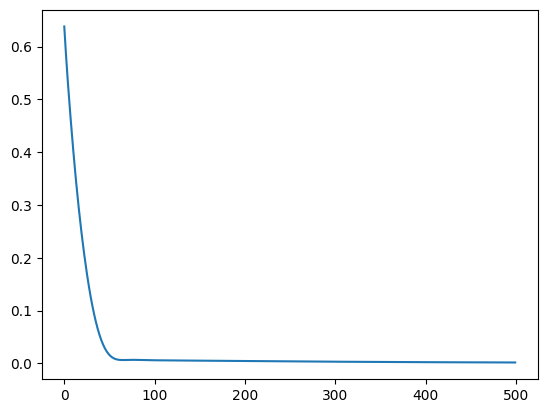

In [29]:
plt.plot(loss_values)
plt.show()

# 2) GENERAZIONE CUSTOM ACTIVATION FUNCTION

Tramite le funzioni si genera una funzione di attivazione casuale, si crea la classe della Custom activation (ossia un nuovo modulo nn.Module) si testa su un tensore. In questo caso è stato testato anche il detach.

In [32]:
def DNA_generator(dna_length,v_min,v_max):
    DNA=np.random.uniform(v_min, v_max, dna_length) 
    return DNA
    
def act_func_generator(DNA,dom_min,dom_max):
    x_dom=np.linspace(dom_min,dom_max,len(DNA))
    function=interp1d(x_dom,DNA,kind='cubic', fill_value="extrapolate")
    return function

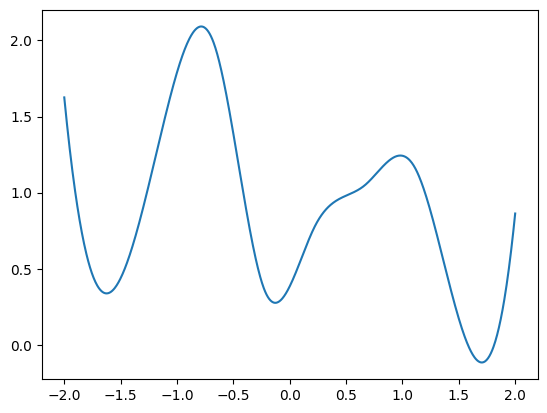

In [33]:
DNA = DNA_generator(10, 0, 2)
function_test = act_func_generator(DNA, -2, 2)

#GROUD TRUTH
x_doms = np.linspace(-2, 2, 1000)
y_doms = function_test(x_doms)

plt.plot(x_doms, y_doms)

In [34]:
class CustomFunction(nn.Module):
    def __init__(self,function):
        super().__init__()
        self.function = function
        
    def forward(self, x):
        x = torch.clamp(x, -2, 2)
        x = x.detach().numpy()
        return torch.tensor(self.function(x), dtype=torch.float32)

In [35]:
x_dom=torch.linspace(-2,2,1000)

In [36]:
activation = CustomFunction(function_test)
y_dom = activation(x_dom)

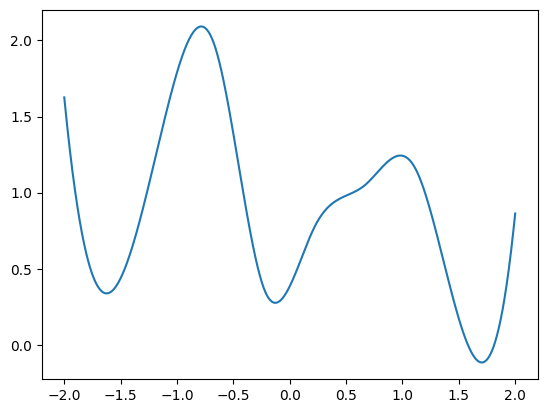

In [37]:
plt.plot(x_dom, y_dom)

# 3) GENERAZIONE MODELLO CON CUSTOM ACTIVATION

In [43]:
class MLP_Custom(nn.Module):
    def __init__(self,input_size,hidden_size,output_size,function):
        super().__init__()
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.custom_activation = CustomFunction(function)
        self.fc2 = nn.Linear(hidden_size,output_size)
        
    def forward(self,x):
        x=self.fc1(x)
        x=self.custom_activation(x)
        x=self.fc2(x)
        return x

In [44]:
model_custom=MLP_Custom(1,8,1,function_test)

In [45]:
model_custom

MLP_Custom(
  (fc1): Linear(in_features=1, out_features=8, bias=True)
  (custom_activation): CustomFunction()
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)

In [40]:
mse_loss=nn.MSELoss()
optimizer=optim.Adam(model_custom.parameters(),lr=0.01)


In [41]:
loss_values_custom=[]
for epoch in range(500):
    model_custom.train()
    optimizer.zero_grad()
    output=model_custom(X_tensor)
    loss=mse_loss(output,Y_tensor)
    print(loss.item())
    loss_values_custom.append(loss.item())
    loss.backward()
    optimizer.step()   
    

0.6282017230987549
0.5703503489494324
0.5275766253471375
0.49670344591140747
0.4763889014720917
0.464536190032959
0.45819616317749023
0.45412546396255493
0.4496289789676666
0.4431111812591553
0.4341142475605011
0.42302459478378296
0.41069114208221436
0.3980933129787445
0.3860991895198822
0.3753107786178589
0.36598852276802063
0.35805144906044006
0.35114747285842896
0.34477776288986206
0.3384421169757843
0.3317624032497406
0.324553906917572
0.3168332576751709
0.3087748885154724
0.3006388247013092
0.292692095041275
0.28514349460601807
0.2781016230583191
0.27156373858451843
0.26543325185775757
0.25955888628959656
0.2537831664085388
0.24798540771007538
0.242109015583992
0.2361660897731781
0.2302226573228836
0.22437049448490143
0.21869637072086334
0.21325676143169403
0.2080654501914978
0.20309504866600037
0.1982906460762024
0.19358977675437927
0.1889418512582779
0.18432080745697021
0.17972861230373383
0.17518927156925201
0.1707371026277542
0.16640356183052063
0.1622069925069809
0.1581482440

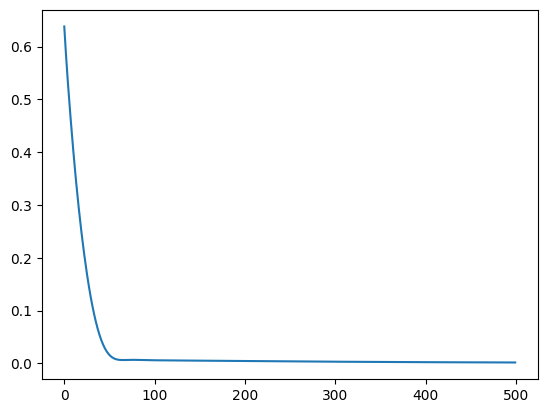

In [42]:
plt.plot(loss_values)
plt.show()